In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import is_numeric_dtype

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#reading our file
data = pd.read_csv("weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
#describing details of our file
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
#getting information about features and labels
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
#checking for columns and dropping unrelavant features
data.columns
data = data.drop(['Formatted Date', 'Precip Type','Loud Cover','Summary',
       'Daily Summary'], axis=1)

In [7]:
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [8]:
#checking data types of our data
data.dtypes

Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
dtype: object

In [9]:
#one hot codeing 
data = pd.get_dummies( data)
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [10]:
#checking for null values
data.isnull().any()

Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Pressure (millibars)        False
dtype: bool

In [11]:
#checking shapes 
data.shape

(96453, 7)

In [12]:
#checking for null values if any
data.isna().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

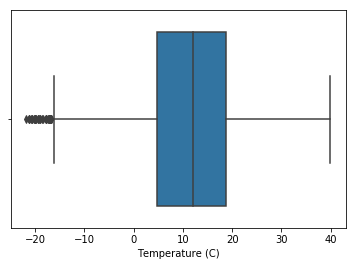

In [13]:
#printing data in boxplot to find outliers
sb.boxplot(data['Temperature (C)'])

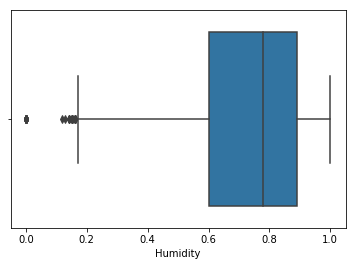

In [14]:
sb.boxplot(data['Humidity'])

In [15]:
# def remove_outlier(data, m=2):
#     return data[abs(data - np.mean(data)) < m * np.std(data)]
def remove_outlier(df):
    low = .25
    high = .75
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df
data= remove_outlier(data)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
8,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22
17,15.550000,15.550000,0.63,11.1573,230.0,11.4471,1016.17
18,14.255556,14.255556,0.69,8.5169,163.0,11.2056,1015.82
19,13.144444,13.144444,0.70,7.6314,139.0,11.2056,1015.83


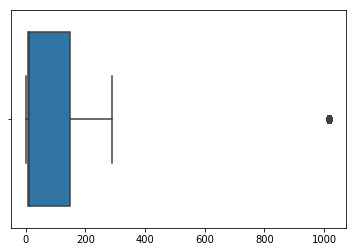

In [16]:

sb.boxplot(data)
data.head()

(array([120., 111., 130.,  96., 202., 252., 203., 258., 240., 262.]),
 array([0.61 , 0.637, 0.664, 0.691, 0.718, 0.745, 0.772, 0.799, 0.826,
        0.853, 0.88 ]),
 <a list of 10 Patch objects>)

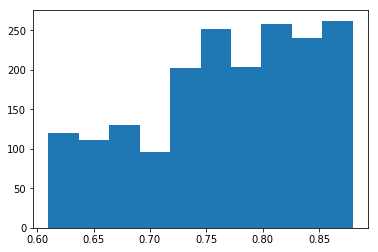

In [17]:
plt.hist(data['Humidity'])

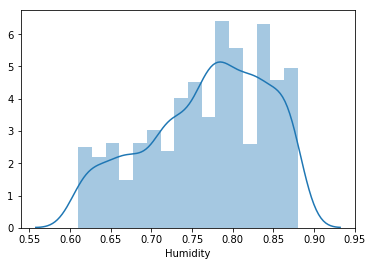

In [18]:
sb.distplot(data['Humidity'])

In [19]:
print("Mean is", data['Humidity'].mean(), data['Humidity'].skew(), ", Median is ", data['Humidity'].median(), "which shows that column data are skwed data")


Mean is 0.7676840981856915 -0.430678626276608 , Median is  0.78 which shows that column data are skwed data


Skewness is -0.27877997193613263


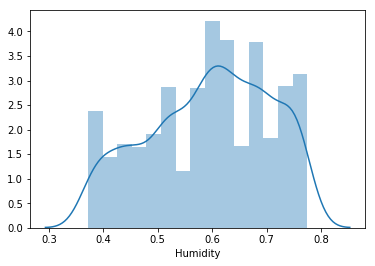

In [20]:
# now transforming feature variable
target = (np.square((data.Humidity)))
print ('Skewness is', target.skew())
sb.distplot(target)

In [21]:
print(target.mean(), target.median())
data['Humidity'] = target

0.594790821771612 0.6084


(array([160., 248., 250., 212., 156., 197., 121., 153., 208., 169.]),
 array([ 4.69444444,  6.10777778,  7.52111111,  8.93444444, 10.34777778,
        11.76111111, 13.17444444, 14.58777778, 16.00111111, 17.41444444,
        18.82777778]),
 <a list of 10 Patch objects>)

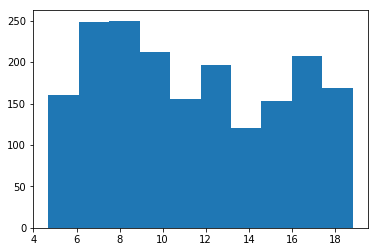

In [22]:
# Histrogram of the target varibale
plt.hist(data['Temperature (C)'])

Mean is 11.407888651725376 , Median is  11.016666666666666 0.2030833159416942


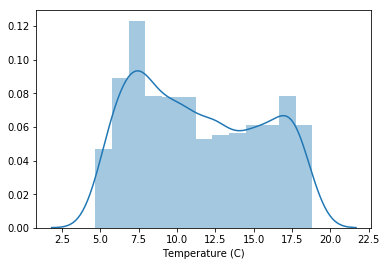

In [23]:
sb.distplot(data['Temperature (C)'])
print("Mean is", data['Temperature (C)'].mean(), ", Median is ", data['Temperature (C)'].median(), data['Temperature (C)'].skew())

In [24]:
# now transforming feature variable
target = (np.cbrt((data['Temperature (C)'])))
print ('Skewness is', target.skew())

Skewness is -0.0792826937299264


2.218013234027705 2.225102746030336


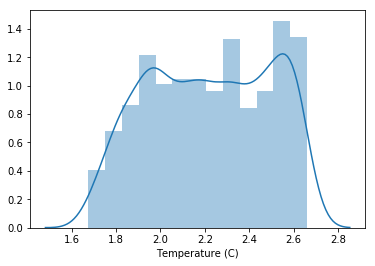

In [25]:
sb.distplot(target)
print(target.mean(), target.median())

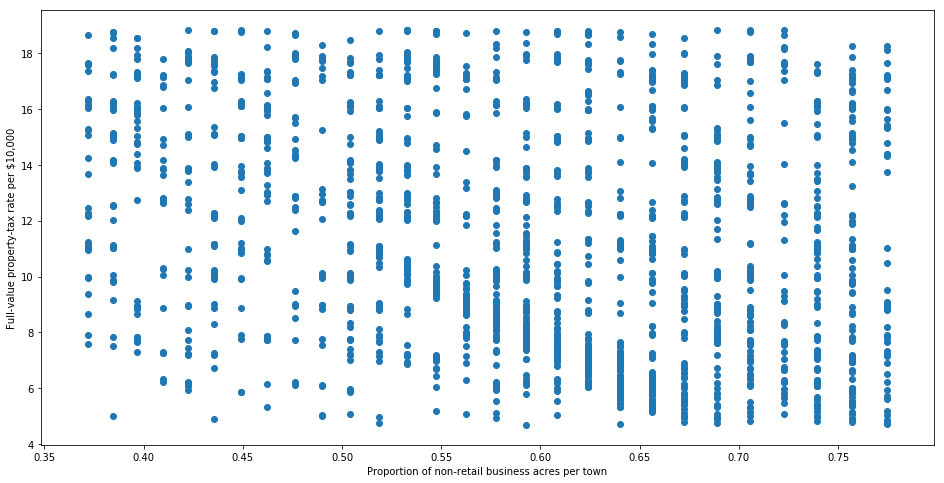

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Humidity'], data['Temperature (C)'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()


In [37]:
class MultiLinearRegression:

    def __init__(self):
        self.alpha = 0.0001
        self.echops = 9000

    def normalize(self,features):
        # we transpose the input matrix , swapping columns and rows to make vector math easier

        for i in features.T:
            fmean = np.mean(features)
            frange = np.amax(features) - np.amin(features)

            features -= fmean
            features /= frange

        return features

    def standardization(self, x_data):
        result = np.array([])
        for i in range(len(x_data)):
            x_std = (x_data[i] - np.mean(x_data)) / np.std(x_data)
            result = np.append(x_std, result)
        return result

    def remove_outlier(self, data):
        low = .05
        high = .95
        quant_df = data.quantile([low, high])
        for name in list(data.columns):
            if pd.is_numeric_dtype(data[name]):
                data = data[(data[name] > quant_df.loc[low, name]) & (data[name] < quant_df.loc[high, name])]
        return data


    def predict(self,features, parameters):
        return np.dot(features, parameters)

    def cost_function(self, features, targets, parameters):
        N = len(targets)

        predictions = self.predict(features, parameters)

        # Matrix math lets use do this without looping
        sq_error = (predictions - targets) ** 2

        # Return average squared error among predictions
        return 1.0 / (2 * N) * sq_error.sum()

    def gradient_descent(self, x_data, targets, parameters):
        m = len(x_data)
        
        # 1 - Get Predictions
        predictions = self.predict(x_data, parameters)

        # 2 - Calculate error/loss
        error = targets - predictions

        gradient = np.dot(-x_data.T, error)

        # 4 Take the average error derivative for each feature
        gradient /= m

        # 5 - Multiply the gradient by our learning rate
        gradient *= self.alpha

        # 6 - Subtract from our weights to minimize cost
        parameters -= gradient

        return parameters

    def accuracy(self, y_test_data, y_pred):
        total_error = 0
        for i in range(len(y_test_data)):
            total_error += (abs((y_pred[i] - y_test_data[i]) / y_test_data[i]))

        total_error = total_error / len(y_test_data)
        accuracy = (total_error) * 100

        return accuracy
 


In [39]:
def main():
    features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
                'Pressure (millibars)']
    predicted_feature = ['Apparent Temperature (C)']
    x_df = data[features]
    y_df = data[predicted_feature]
    

    x_df = (x_df - x_df.mean()) / x_df.std()

    x_data_set = np.array(pd.DataFrame(x_df, columns=features))
    y_data_set = np.array(pd.DataFrame(y_df, columns=predicted_feature))

    mlr = MultiLinearRegression()
    
    theta_vector = np.zeros(((len(features) + 1), 1), dtype='f')
    
    x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        x_data_set, y_data_set, test_size=0.35, random_state = 42)

 
    x_data_train = np.column_stack((np.ones((x_data_train.shape[0], 1)), x_data_train))

    x_data_test = np.column_stack((np.ones((x_data_test.shape[0], 1)), x_data_test))

    parameters = mlr.gradient_descent(x_data_train, y_data_train, theta_vector)
    

    y_prediction = mlr.predict(x_data_test, parameters)
    
    y_prediction_train = mlr.predict(x_data_train, parameters)
    
#     cost = mlr.cost_function(x_data_train, y_prediction, parameters)

    

    accuracy = mlr.accuracy(y_data_test, y_prediction)
    accuracy_train = mlr.accuracy(y_data_train, y_prediction_train)

    print("accuracy train: ", accuracy_train, "accuracy test: ", accuracy)
    print("MSE test: ", mean_squared_error(y_data_test, y_prediction))
    print("MSE train: ", mean_squared_error(y_data_train, y_prediction_train))
    
        #plot the cost
#     fig, ax = plt.subplots()  
#     ax.plot(np.arange(9000), cost, 'r')  
#     ax.set_xlabel('Iterations', color = 'cyan')  
#     ax.set_ylabel('Cost', color = 'cyan')  
#     ax.set_title('Error vs. Training Epoch') 



if __name__ == '__main__':
    main()


accuracy train:  [99.99060582] accuracy test:  [99.99109914]
MSE test:  132.350641677364
MSE train:  137.8981630337009
